# Video Game Data Analysis in Python: 1995-2016
<br>
<img src="Video-Game-Systems.jpg" align='left' width="285" length= "196">

## Introduction

This notebook is created as part of a Capstone project for the Data Analytics Career Track program at Springboard.  It will be paired with a Tableau dashboard to show different slices of the data and display different Python techniques.

The data is focused on video game sales and critic/user ratings (when available) for video games that were released from 1995-2016. The background for the fictitious scenario in this particular project is a video game store would like to showcase more data historical information for video games enthusiasts that visit the store as an added attraction and source of information.  The dataset provides a nice opportunity to learn and showcase various ways in Python, Matplotlib, Numpy, Seaborn, etc to compute and visually showcase data.  The old saying goes "There are multiple ways to skin a cat" and that's the case here.  These graphs and queries show certain specific ways but they of course aren't the only way.

One technical theme of interest that came out of generating this data was producing an animated 'slideshow' that would show multiple pieces of information per year over 21 years rather than in those cases trying to crowd everything into one graph.  This was an opportunity to learn/discover the 'FuncAnimation' functionality from the Animation library that can be used to repeatedly call functions to produce different animations in Python.  In this fictitious case, the video game store could have these different animations playing in the store as an added attraction.

## Import Relevant Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML
import matplotlib.colors as mc
import colorsys
from random import randint
import re
%matplotlib inline

## Read the Dataset

The data is from https://www.kaggle.com/rush4ratio/video-game-sales-with-ratings/ and based on a scrape of Vgchartz.com that contained video game data on almost 17k games from 1980-2016.  It later added corresponding critic/user scores and ratings from Metacritic for ~6,900 games.  While the original data description said that only games with over 100,000 units sold were included, it appears from the data that games with over 10,000 units are included.

In [2]:
#import the csv file into Python 
vg_data=pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')

In [3]:
#view the first 10 rows
vg_data.head(10)

Name Platform  Year_of_Release         Genre  \
0                 Wii Sports      Wii           2006.0        Sports   
1          Super Mario Bros.      NES           1985.0      Platform   
2             Mario Kart Wii      Wii           2008.0        Racing   
3          Wii Sports Resort      Wii           2009.0        Sports   
4   Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
5                     Tetris       GB           1989.0        Puzzle   
6      New Super Mario Bros.       DS           2006.0      Platform   
7                   Wii Play      Wii           2006.0          Misc   
8  New Super Mario Bros. Wii      Wii           2009.0      Platform   
9                  Duck Hunt      NES           1984.0       Shooter   

  Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  \
0  Nintendo     41.36     28.96      3.77         8.45         82.53   
1  Nintendo     29.08      3.58      6.81         0.77         40.24   
2  Nintendo     15.68     12.76      3.79         3.29         35.52   
3  Nintendo     15.61     10.93      3.28         2.95         32.77   
4  Nintendo     11.27      8.89     10.22         1.00         31.37   
5  Nintendo     23.20      2.26      4.22         0.58         30.26   
6  Nintendo     11.28      9.14      6.50         2.88         29.80   
7  Nintendo     13.96      9.18      2.93         2.84         28.92   
8  Nintendo     14.44      6.94      4.70         2.24         28.32   
9  Nintendo     26.93      0.63      0.28         0.47         28.31   

   Critic_Score  Critic_Count User_Score  User_Count Developer Rating  
0          76.0          51.0          8       322.0  Nintendo      E  
1           NaN           NaN        NaN         NaN       NaN    NaN  
2          82.0          73.0        8.3       709.0  Nintendo      E  
3          80.0          73.0          8       192.0  Nintendo      E  
4           NaN           NaN        NaN         NaN       NaN    NaN  
5           NaN           NaN        NaN         NaN       NaN    NaN  
6          89.0          65.0        8.5       431.0  Nintendo      E  
7          58.0          41.0        6.6       129.0  Nintendo      E  
8          87.0          80.0        8.4       594.0  Nintendo      E  
9           NaN           NaN        NaN         NaN       NaN    NaN

Get a look at the data contents and structure by looking at the first 10 rows

## Data Assessment and Data Cleansing

In [4]:
#shows how many rows and columns are in original dataset
vg_data.shape

(16719, 16)

Initally the data contains almost 17k rows and 16 columns

In [5]:
vg_data.describe()

Year_of_Release      NA_Sales      EU_Sales      JP_Sales  \
count     16450.000000  16719.000000  16719.000000  16719.000000   
mean       2006.487356      0.263330      0.145025      0.077602   
std           5.878995      0.813514      0.503283      0.308818   
min        1980.000000      0.000000      0.000000      0.000000   
25%        2003.000000      0.000000      0.000000      0.000000   
50%        2007.000000      0.080000      0.020000      0.000000   
75%        2010.000000      0.240000      0.110000      0.040000   
max        2020.000000     41.360000     28.960000     10.220000   

        Other_Sales  Global_Sales  Critic_Score  Critic_Count    User_Count  
count  16719.000000  16719.000000   8137.000000   8137.000000   7590.000000  
mean       0.047332      0.533543     68.967679     26.360821    162.229908  
std        0.186710      1.547935     13.938165     18.980495    561.282326  
min        0.000000      0.010000     13.000000      3.000000      4.000000  
25%        0.000000      0.060000     60.000000     12.000000     10.000000  
50%        0.010000      0.170000     71.000000     21.000000     24.000000  
75%        0.030000      0.470000     79.000000     36.000000     81.000000  
max       10.570000     82.530000     98.000000    113.000000  10665.000000

Running a quick descriptive stats summary of the quanitative metrics gives an idea of the metric spread and distribution.  For example, from this it is clear that the highest grossing video game for global sales was $82.5 million, and we'll see what game that was in subsquent queries.

In [6]:
vg_data.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

Looking at the dataset to see which columns contain null values.  At this point it's expected that the last few columns (added from Metacritic) have a lot of nulls since not all games have Metacritic ratings.  However, there are nulls in 3 of the other "core" columns that should be handled. 

In [7]:
vg_data.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score          object
User_Count         float64
Developer           object
Rating              object
dtype: object

Looking at the column datatypes, 'Year of Release' (float to int) and 'User Score' (object to float) stand out as likely needed to be changed.

In [8]:
vg_data_clean=vg_data.copy()

Before editing any of the data, creating a copy of the original dataset for the "cleaned" dataset.

In [9]:
#Converting Year of Release to Int to avoid the '.0' in the name
vg_data_clean['Year_of_Release']=vg_data_clean['Year_of_Release'].astype(pd.Int32Dtype())

In [10]:
vg_data_clean.groupby(['User_Score']).size()

User_Score
0         1
0.2       2
0.3       2
0.5       2
0.6       2
       ... 
9.4      11
9.5       6
9.6       2
9.7       1
tbd    2425
Length: 96, dtype: int64

User_Score was an 'object' datatype because there are rows marked 'tbd' which isn't meaningful.  These 'tbd' values will be changed to NAN and then the column can be changed to a float type.

In [11]:
vg_data_clean['User_Score'] = vg_data_clean['User_Score'].replace({'tbd': np.nan})

In [12]:
#show column amounts and types
vg_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
Name               16717 non-null object
Platform           16719 non-null object
Year_of_Release    16450 non-null Int32
Genre              16717 non-null object
Publisher          16665 non-null object
NA_Sales           16719 non-null float64
EU_Sales           16719 non-null float64
JP_Sales           16719 non-null float64
Other_Sales        16719 non-null float64
Global_Sales       16719 non-null float64
Critic_Score       8137 non-null float64
Critic_Count       8137 non-null float64
User_Score         7590 non-null object
User_Count         7590 non-null float64
Developer          10096 non-null object
Rating             9950 non-null object
dtypes: Int32(1), float64(8), object(7)
memory usage: 2.0+ MB


In [13]:
#change User Score column to float
vg_data_clean['User_Score']=vg_data_clean['User_Score'].astype(float)

In [14]:
#show first 10 rows of dataset
vg_data_clean.head(10)

Name Platform  Year_of_Release         Genre  \
0                 Wii Sports      Wii             2006        Sports   
1          Super Mario Bros.      NES             1985      Platform   
2             Mario Kart Wii      Wii             2008        Racing   
3          Wii Sports Resort      Wii             2009        Sports   
4   Pokemon Red/Pokemon Blue       GB             1996  Role-Playing   
5                     Tetris       GB             1989        Puzzle   
6      New Super Mario Bros.       DS             2006      Platform   
7                   Wii Play      Wii             2006          Misc   
8  New Super Mario Bros. Wii      Wii             2009      Platform   
9                  Duck Hunt      NES             1984       Shooter   

  Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  \
0  Nintendo     41.36     28.96      3.77         8.45         82.53   
1  Nintendo     29.08      3.58      6.81         0.77         40.24   
2  Nintendo     15.68     12.76      3.79         3.29         35.52   
3  Nintendo     15.61     10.93      3.28         2.95         32.77   
4  Nintendo     11.27      8.89     10.22         1.00         31.37   
5  Nintendo     23.20      2.26      4.22         0.58         30.26   
6  Nintendo     11.28      9.14      6.50         2.88         29.80   
7  Nintendo     13.96      9.18      2.93         2.84         28.92   
8  Nintendo     14.44      6.94      4.70         2.24         28.32   
9  Nintendo     26.93      0.63      0.28         0.47         28.31   

   Critic_Score  Critic_Count  User_Score  User_Count Developer Rating  
0          76.0          51.0         8.0       322.0  Nintendo      E  
1           NaN           NaN         NaN         NaN       NaN    NaN  
2          82.0          73.0         8.3       709.0  Nintendo      E  
3          80.0          73.0         8.0       192.0  Nintendo      E  
4           NaN           NaN         NaN         NaN       NaN    NaN  
5           NaN           NaN         NaN         NaN       NaN    NaN  
6          89.0          65.0         8.5       431.0  Nintendo      E  
7          58.0          41.0         6.6       129.0  Nintendo      E  
8          87.0          80.0         8.4       594.0  Nintendo      E  
9           NaN           NaN         NaN         NaN       NaN    NaN

Metacritic User_Score is now a float type, but when comparing to 'Critic Score' the value is always 10x less.  User_Score will be multiplied by 10 to get it on the same scale as Critic Score for potential comparison. 

In [15]:
#Multiplying User Score by 10 to make it on the same scale as Critic Score.
vg_data_clean['User_Score']=10*vg_data_clean['User_Score']

In [16]:
vg_data_clean.groupby(['Year_of_Release']).size()

Year_of_Release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      62
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
2017       3
2020       1
dtype: int64

Getting a quick distribution of game release volume by year in the dataset.  Decided to focus on the years of 1995-2016 for this analysis.  The game volume per year before the mid-nineties is much lower likely due to a) not as much related sales data being logged for games during those years and b) the overall industry was less widely popular and mature.  So, these years prior to 1995 will be removed from the dataframe to keep it focused on 1995-2016.

In addition, there are a few games logged as released in 2017 and 2020, though the dataset is only through 2016.  These appear to be mistakes and can be dropped from the dataset.  A list of years to exclude is created.

In [17]:
#list of years to exclude
years_exclude = [1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,2017,2020]

In [18]:
# exclude the unwanted years from the dataset
vg_data_clean=vg_data_clean[~vg_data_clean.Year_of_Release.isin(years_exclude)]

In [19]:
#verify dataset now has only the correct years
vg_data_clean.groupby(['Year_of_Release']).size()

Year_of_Release
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
dtype: int64

The dataframe now includes only the desired years of 1995-2016.

In [20]:
vg_data_clean.isnull().sum()

Name                  0
Platform              0
Year_of_Release     269
Genre                 0
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8094
Critic_Count       8094
User_Score         8641
User_Count         8641
Developer          6137
Rating             6283
dtype: int64

For the rows with no Publisher info, replace the value with "Unknown" rather than null and potentially elimnating entire game row.  For the null Year of Release rows, those rows will be dropped given Year of Release is such an important variable to the analysis and only want to count games with a known Year of Release.

In [21]:
#replace NA values with 'Unknown'
vg_data_clean['Publisher'].fillna('Unknown', inplace=True)

In [22]:
#drop na values in Year of Release column
vg_data_clean=vg_data_clean.dropna(subset=['Year_of_Release'])

In [23]:
vg_data_clean.isnull().sum()

Name                  0
Platform              0
Year_of_Release       0
Genre                 0
Publisher             0
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       7979
Critic_Count       7979
User_Score         8499
User_Count         8499
Developer          6057
Rating             6195
dtype: int64

All non-Metacritic rows now have 0 null values.

In [24]:
vg_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15958 entries, 0 to 16718
Data columns (total 16 columns):
Name               15958 non-null object
Platform           15958 non-null object
Year_of_Release    15958 non-null Int32
Genre              15958 non-null object
Publisher          15958 non-null object
NA_Sales           15958 non-null float64
EU_Sales           15958 non-null float64
JP_Sales           15958 non-null float64
Other_Sales        15958 non-null float64
Global_Sales       15958 non-null float64
Critic_Score       7979 non-null float64
Critic_Count       7979 non-null float64
User_Score         7459 non-null float64
User_Count         7459 non-null float64
Developer          9901 non-null object
Rating             9763 non-null object
dtypes: Int32(1), float64(9), object(6)
memory usage: 2.0+ MB


While Critic Score, User Score, and Rating (all from Metacritic) will be interesting for analysis, Critic Count, User Count, and Developer aren't needed.  To simplify the dataset, those columns will be removed.

In [25]:
#dropping unneeded columns
vg_data_clean=vg_data_clean.drop(['Critic_Count', 'User_Count','Developer'],axis=1)

In [26]:
vg_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15958 entries, 0 to 16718
Data columns (total 13 columns):
Name               15958 non-null object
Platform           15958 non-null object
Year_of_Release    15958 non-null Int32
Genre              15958 non-null object
Publisher          15958 non-null object
NA_Sales           15958 non-null float64
EU_Sales           15958 non-null float64
JP_Sales           15958 non-null float64
Other_Sales        15958 non-null float64
Global_Sales       15958 non-null float64
Critic_Score       7979 non-null float64
User_Score         7459 non-null float64
Rating             9763 non-null object
dtypes: Int32(1), float64(7), object(5)
memory usage: 1.7+ MB


Verified unneeded columns are no longer there.

In [27]:
vg_data_clean.describe()

Year_of_Release      NA_Sales      EU_Sales      JP_Sales  \
count     15958.000000  15958.000000  15958.000000  15958.000000   
mean       2007.016731      0.250055      0.145736      0.067067   
std           5.033313      0.716102      0.509061      0.280242   
min        1995.000000      0.000000      0.000000      0.000000   
25%        2004.000000      0.000000      0.000000      0.000000   
50%        2008.000000      0.080000      0.020000      0.000000   
75%        2011.000000      0.230000      0.110000      0.030000   
max        2016.000000     41.360000     28.960000     10.220000   

        Other_Sales  Global_Sales  Critic_Score   User_Score  
count  15958.000000  15958.000000   7979.000000  7459.000000  
mean       0.048165      0.511282     68.994235    71.271350  
std        0.190015      1.472250     13.921834    14.986025  
min        0.000000      0.010000     13.000000     0.000000  
25%        0.000000      0.060000     60.000000    64.000000  
50%        0.010000      0.160000     71.000000    75.000000  
75%        0.030000      0.450000     79.000000    82.000000  
max       10.570000     82.530000     98.000000    97.000000

In [28]:
vg_data_clean.isnull().sum()

Name                  0
Platform              0
Year_of_Release       0
Genre                 0
Publisher             0
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       7979
User_Score         8499
Rating             6195
dtype: int64

In [29]:
vg_data_clean.head(5)

Name Platform  Year_of_Release         Genre Publisher  \
0                Wii Sports      Wii             2006        Sports  Nintendo   
2            Mario Kart Wii      Wii             2008        Racing  Nintendo   
3         Wii Sports Resort      Wii             2009        Sports  Nintendo   
4  Pokemon Red/Pokemon Blue       GB             1996  Role-Playing  Nintendo   
6     New Super Mario Bros.       DS             2006      Platform  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  Critic_Score  \
0     41.36     28.96      3.77         8.45         82.53          76.0   
2     15.68     12.76      3.79         3.29         35.52          82.0   
3     15.61     10.93      3.28         2.95         32.77          80.0   
4     11.27      8.89     10.22         1.00         31.37           NaN   
6     11.28      9.14      6.50         2.88         29.80          89.0   

   User_Score Rating  
0        80.0      E  
2        83.0      E  
3        80.0      E  
4         NaN    NaN  
6        85.0      E

The data is now "clean" and ready for further analysis.


## Video Game Data Exploration and Visualization in Python

### Video Game Releases per Year

Creating a bar graph to see a visual representation of the game unit release distribution over the year range.

Text(0.5, 1.0, 'Total Count of Game Releases per Year')

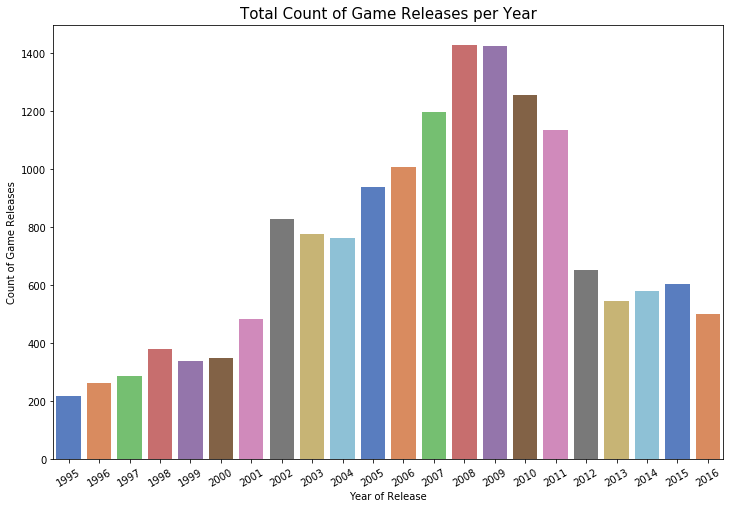

In [30]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 15
ax = sns.countplot(x="Year_of_Release", data=vg_data_clean, palette="muted")
ax.set_xlabel('Year of Release')
ax.set_ylabel('Count of Game Releases')
#rotating x axis labels 30 degrees
plt.xticks(rotation=30)
ax.set_title('Total Count of Game Releases per Year')

The 'peak' period of the date range for game release volume is 2002-2012 with 2008 and 2009 being the top years having more than 1400 games released per year. All years had over 200 games released and 1995 had the least amount with just over 200 games.

### Video Games Regional Sales by Year of Release

The data can be explored in terms of geographical sales over time with the 4 available regional sales columns - North America, European Union, Japan, and Other. 4 regional dataframes are created from using 'pivot_table' to sum the regional sales by year, and a Matplotlib line plot is created showing the trends over time.

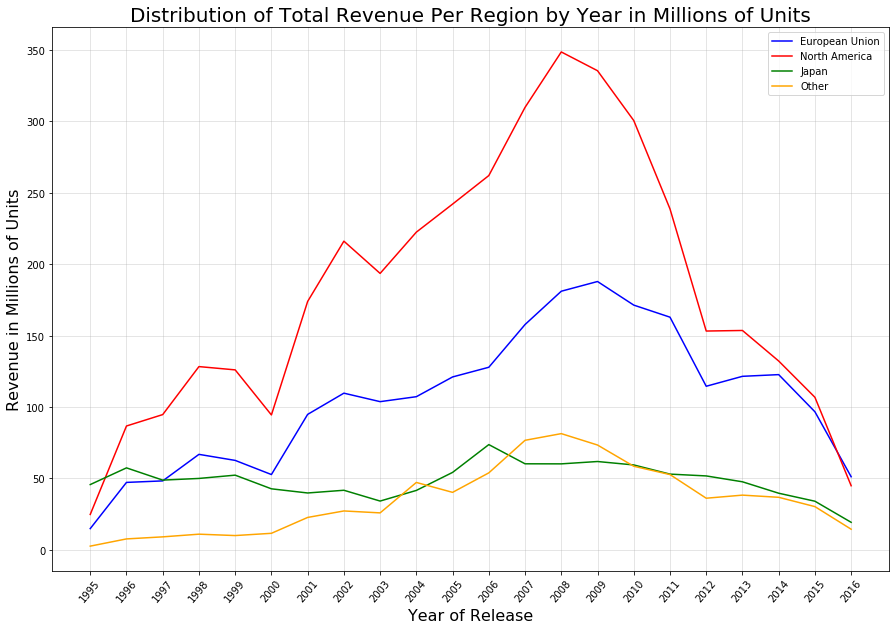

In [31]:
#create regional dataframes using pivot_table to sum regional sales by year
NA = vg_data_clean.pivot_table('NA_Sales', columns='Name', index='Year_of_Release', aggfunc='sum').sum(axis=1)
EU = vg_data_clean.pivot_table('EU_Sales', columns='Name', index='Year_of_Release', aggfunc='sum').sum(axis=1)
JP = vg_data_clean.pivot_table('JP_Sales', columns='Name', index='Year_of_Release', aggfunc='sum').sum(axis=1)
Other = vg_data_clean.pivot_table('Other_Sales', columns='Name', index='Year_of_Release', aggfunc='sum').sum(axis=1)
years = NA.index.astype(int)

#Creating line plot to show yearly regional sales
fig, ax = plt.subplots(figsize=(15,10))

ax = plt.plot(years, EU, color='blue', label='European Union')
ax = plt.plot(years, NA, color='red', label='North America')
ax = plt.plot(years, JP, color='green', label='Japan')
ax = plt.plot(years, Other, color='orange', label= 'Other')
plt.xticks(rotation=50)
#showing every year on the x axis
plt.xticks(np.arange(min(years), max(years)+1, 1.0))
plt.ylabel('Revenue in Millions of Units', fontsize=16)
plt.xlabel('Year of Release', fontsize=16)
plt.title(label='Distribution of Total Revenue Per Region by Year in Millions of Units', fontsize=20)
plt.legend(loc='upper right')
plt.grid(alpha=0.4)
plt.show()

Game sales are consistently significantly higher in North America than other regions every year except the first (1995) and last (2016).  All 4 regional sales have roughly the same line shape, indicating they generally increase or decrease together each year (Japan appears to be  the most different, staying relatively flat or decreasing during the peak periods of 2004-2009, while the other 3 regions steadily increase.) 

### Video Game Regional Sales Per Game Distribution

For the regional sales columns in the dataset, boxplots can show the distribution of sales per game data in different levels like min, quartiles, and max.

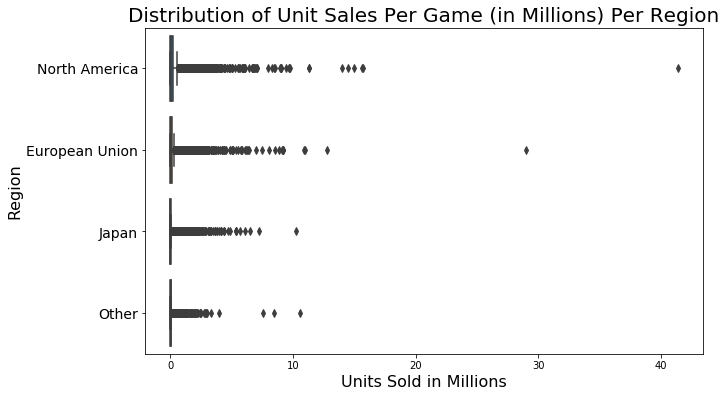

In [32]:
regsales = pd.DataFrame(vg_data_clean[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']])
regions = ['North America', 'European Union','Japan', 'Other']
plt.figure(figsize=(10,6))

ax = sns.boxplot(data=regsales, orient='h')
ax.set_xlabel(xlabel='Units Sold in Millions', fontsize=16)
ax.set_ylabel(ylabel='Region', fontsize=16)
ax.set_title(label='Distribution of Unit Sales Per Game (in Millions) Per Region', fontsize=20)
ax.set_yticklabels(labels=regions, fontsize=14)
plt.show()

The Seaborn boxplot feature is used to show the data distribution of regional unit sales per game. The initial boxplot is hard to read because of the large sales spread and presence of huge single game sales outliers of millions of units sold (the single dot over 40 million represents the highest selling game - Wii Sports.)  Another boxplot can be run eliminating some of these larger game totals to more easily see the rest of the distribution for the majority of games.

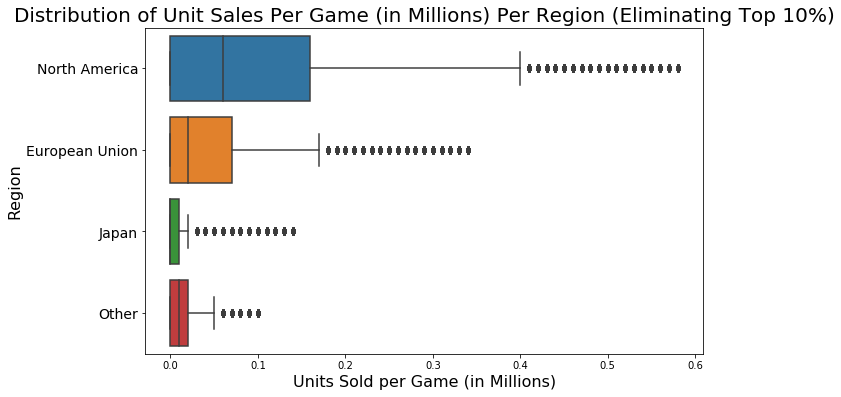

In [33]:
#Get 90th percentile of sales for each column
q = regsales.quantile(0.90)
#new dataframe containing new quantiles
regsales90 = regsales[regsales < q]

plt.figure(figsize=(10,6))

ax = sns.boxplot(data=regsales90, orient='h')
ax.set_xlabel(xlabel='Units Sold per Game (in Millions)', fontsize=16)
ax.set_ylabel(ylabel='Region', fontsize=16)
ax.set_title(label='Distribution of Unit Sales Per Game (in Millions) Per Region (Eliminating Top 10%)', fontsize=20)
ax.set_yticklabels(labels=regions, fontsize=14)
plt.show()

To eliminate some of the larger sales outliers, the Python 'quantile' feature is used to only show data for each column below a certain percentage of games as far as where they are ranked sales-wise.In this case, it is set to 0.9 and a new dataframe is created to only include data for each column that is in the 90th percentile (top 10% of games (highest sales) removed).  Removing the top 10% gives a much easier view of the boxplot and still represents 90% of the games in the datframe.  North America clearly has the largest spread of unit sales per game as well as the largest amount of 'outliers' even after 10% are removed.  

### Video Game Release Totals by Platform

Over the years there have been quite a few different video game systems (aka platforms) that gamers have enjoyed.  A key part of this analysis is highlighting different aspects of video platform behavior, and this starts by taking a look at game unit releases by different platforms.

In [34]:
vg_data_plat=vg_data_clean.groupby(['Platform']).size().rename('count').reset_index().sort_values(by=['count'], ascending=False)

A new dataframe grouped by platform is created and a new 'count' column is created by getting the number of games by platform

In [35]:
vg_data_plat.head(3)

Platform  count
12      PS2   2127
3        DS   2120
13      PS3   1306

To visually see the overall distribution of game releases by platform, a Seaborn barplot is created.

Text(0.5, 1.0, 'Total Count of Game Releases by Platform')

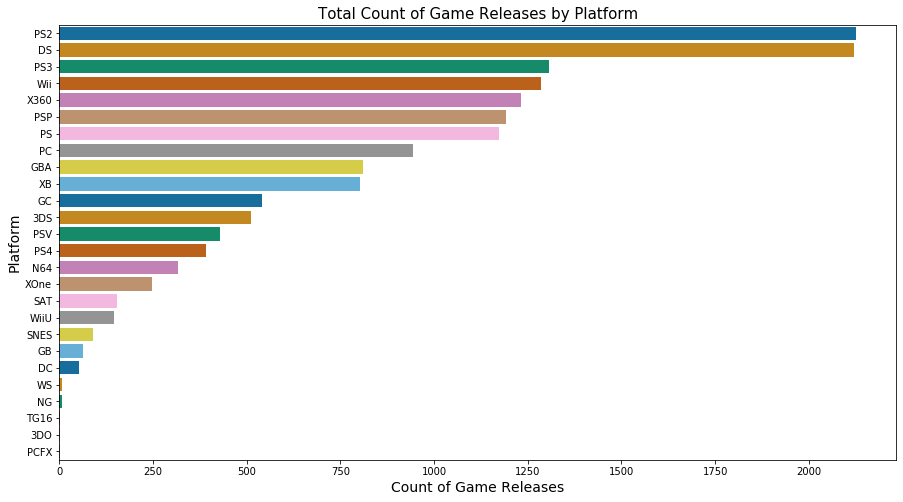

In [36]:
fig, ax = plt.subplots(figsize=(15, 8))
ax=sns.barplot(x=vg_data_plat['count'],y=vg_data_plat['Platform'], orient='h', palette="colorblind")
ax.set_xlabel('Count of Game Releases')
ax.set_ylabel('Platform')
ax.set_title('Total Count of Game Releases by Platform')

For this dataset spanning 1995-2016, the platform with the most releases is Playstation 2 followed closely by Nintendo DS with both having more than 2000 games included.  These are ~40% more than the next highest game system (Playstation 3). 26 different platforms have games released during the time period.

### Video Game Release Totals by Platform by Year (graph and 'slideshow')

After seeing overall platform game release volume, the data can be broken down by year to see when each platform had its 'heyday'.

In [37]:
vg_data_group=vg_data_clean.groupby(['Year_of_Release','Platform']).size().rename('count').reset_index().sort_values(by=['Year_of_Release','count'], ascending=False)

Another dataframe is created this time grouping data by both Platform and Year of Release and showing the related game unit release counts.

In [38]:
vg_data_group.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 187 entries, 181 to 7
Data columns (total 3 columns):
Year_of_Release    187 non-null int64
Platform           187 non-null object
count              187 non-null int64
dtypes: int64(2), object(1)
memory usage: 5.8+ KB


Given the amount of platforms and years, instead of trying to show all data on one crowded graph, the data can be shown one year at a time by either calling a single year individually or showing a 'slideshow' of each year.

In [39]:
#variable to set the desired year to show
current_year=2011

A variable for a single year is created so it can easily change the data based on year.

In [40]:
vg_data_group_year=vg_data_group[vg_data_group['Year_of_Release'].eq(current_year)]

Another dataframe is created that is a slight variation of the previous one - this dataframe will consist of the platform unit release amounts for a single year - whatever year the 'current_year' variable is set to.

In [41]:
vg_data_group_year

Year_of_Release Platform  count
133             2011      PS3    215
137             2011     X360    206
130             2011       DS    153
136             2011      Wii    143
131             2011       PC    139
134             2011      PSP    139
129             2011      3DS    116
135             2011      PSV     18
132             2011      PS2      7

Since the current_year variable was set to 2011, the dataframe now shows all platform game release counts for 2011.

Now that the dataframe for game unit release by platform for a specfic year is created, the data can now be shown visually through charts.

Text(0.5, 1.0, 'Total Count of Game Releases by Platform in 2011')

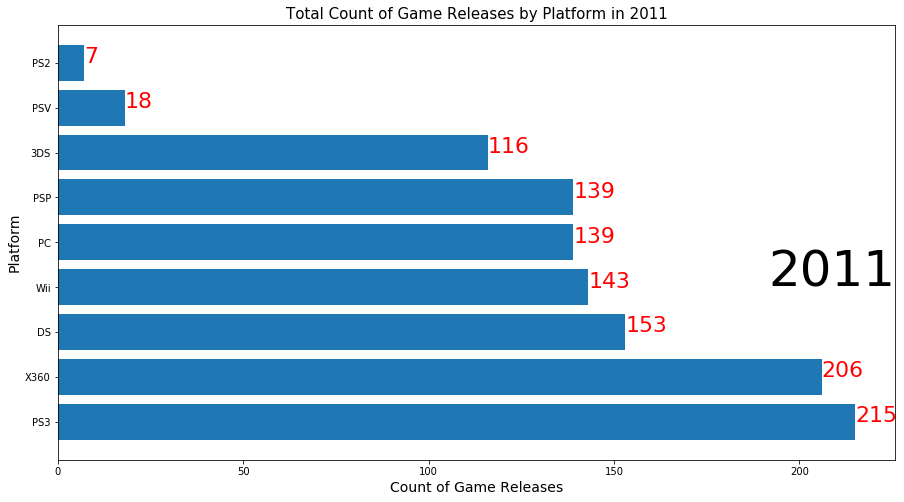

In [42]:
fig, ax = plt.subplots(figsize=(15, 8))
#horizontal bar graph of platform and count
ax.barh(vg_data_group_year['Platform'], vg_data_group_year['count'])
#loop to put text of game release total after the bar
for i, (count, Platform) in enumerate(zip(vg_data_group_year['count'], vg_data_group_year['Platform'])):
    ax.text(count, i,     count, ha='left', color = 'red', size = 22)
#Putting a bigger year label on the right of graph to make it more obvious what year the data is showing
ax.text(1, 0.4, current_year, transform=ax.transAxes, size=50, ha='right')
ax.set_xlabel('Count of Game Releases')
ax.set_ylabel('Platform')
ax.set_title('Total Count of Game Releases by Platform in' + ' ' + str(current_year))

The graph shows the platform unit release data for an example year of 2011 (which can be changed when re-setting the 'current_year' variable).  The bar size order should be changed to have highest at top and a function can be created to easily specify the year.

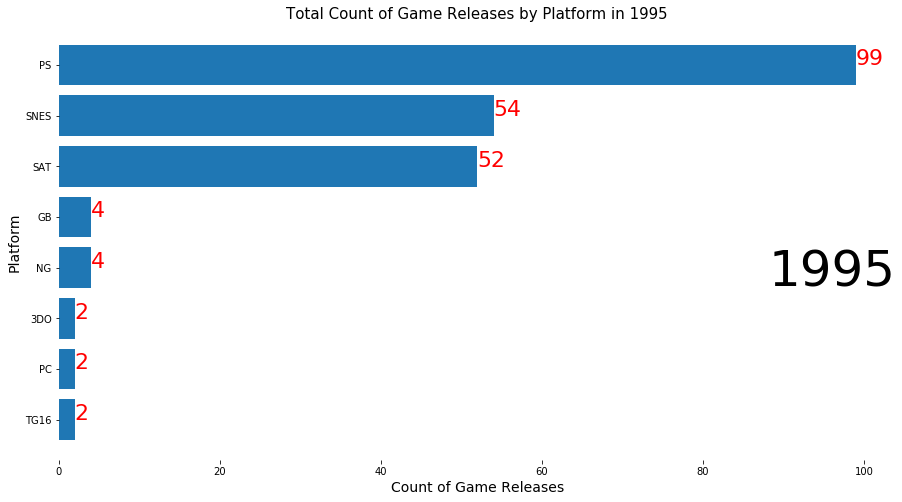

In [43]:
fig, ax = plt.subplots(figsize=(15, 8))
#creating a function to produce the chart for a specified year
def draw_barchart(year):
    vg_data_group_year=vg_data_group[vg_data_group['Year_of_Release'].eq(year)]
    #Reversing order of rows to show biggest bar at top
    vg_data_group_year = vg_data_group_year[::-1]
    ax.clear()
    #horizontal bar graph of platform and count
    ax.barh(vg_data_group_year['Platform'], vg_data_group_year['count'])
    #loop to put text of game release total after the bar
    for i, (count, Platform) in enumerate(zip(vg_data_group_year['count'], vg_data_group_year['Platform'])):
        #ax.text(count, i,     Platform, color = 'black',           ha='right', size = 15)
        ax.text(count, i,     count, ha='left', color = 'red', size = 22)
    #Putting a bigger year label on the right of graph to make it more obvious what year the data is showing
    ax.text(1, 0.4, year, transform=ax.transAxes, size=50, ha='right')
    ax.set_xlabel('Count of Game Releases')
    ax.set_ylabel('Platform')
    ax.set_title('Total Count of Game Releases by Platform in' + ' ' + str(year))
    plt.box(False)
    
#calling function with the year 1995    
draw_barchart(1995)

The bigger bars now start at the top and year can easily be changed in the function for a particular year of interest.  To see the data for the whole date range instead of running for a single year each time, an animated 'slideshow' can be created that can show all years.

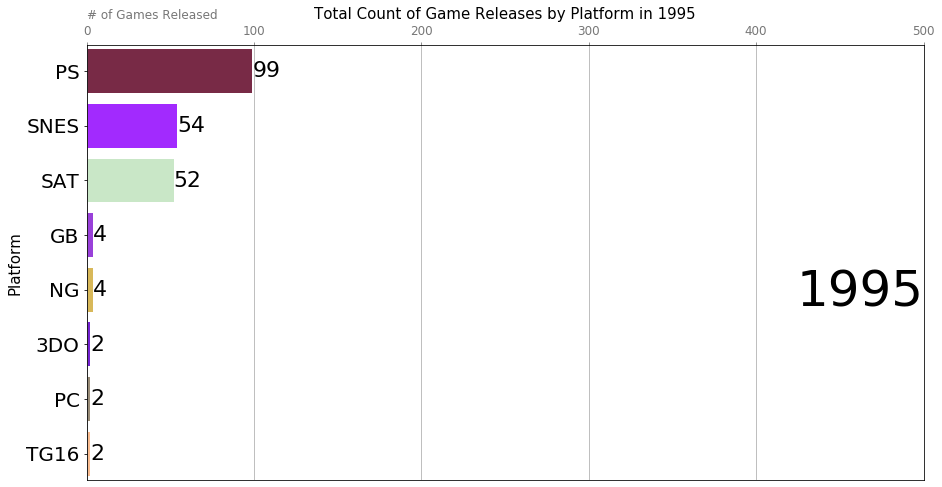

In [44]:

#Code to assign each platform a different color and keep them consistent if the years are changed
def transform_color(color, amount = 0.5):
    try:
        c = mc.cnames[color]
    except:
        c = color
        c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], 1 - amount * (1 - c[1]), c[2])

all_names = vg_data_group['Platform'].unique().tolist()
random_hex_colors = []
for i in range(len(all_names)):
    random_hex_colors.append('#' + '%06X' % randint(0, 0xFFFFFF))

rgb_colors = [transform_color(i, 1) for i in random_hex_colors]


#Create figure and call the draw_barchart function
fig, ax = plt.subplots(figsize=(15, 8))
def draw_barchart(year):
    vg_data_group_year=vg_data_group[vg_data_group['Year_of_Release'].eq(year)]
    vg_data_group_year = vg_data_group_year[::-1]
    ax.clear()
    
    bar_colors = dict(zip(vg_data_group['Platform'].unique(), rgb_colors))
    
    #horizontal bar graph of platform and count
    ax.barh(vg_data_group_year['Platform'], vg_data_group_year['count'], color = [bar_colors[i] for i in vg_data_group_year['Platform']])
    #loop to put text of game release total after the bar
    for i, (count, Platform) in enumerate(zip(vg_data_group_year['count'], vg_data_group_year['Platform'])):
        ax.text(count, i,     count, ha='left', va='center', color = 'black', size = 22)
    #Putting a bigger year label on the right of graph to make it more obvious what year the data is showing
    ax.text(1, 0.4, year, transform=ax.transAxes, size=50, ha='right')
    ax.text(0, 1.06, '# of Games Released', transform=ax.transAxes, size=12, color='#777777')
    
    
    ax.xaxis.set_ticks_position('top')

    plt.tick_params(labelsize = 20)
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.margins(0, 0.01)
    #setting gridlines on chart
    ax.grid(which='major', axis='x', linestyle='-')
    #setting an x axis max value amount to close to the platform with the highest releases in a year to show relative comparisions across years
    ax.set_xlim(xmax=500)
    #ax.set_xlabel('Count of Game Releases', size=15)
    ax.set_ylabel('Platform', size=15)
    ax.set_title('Total Count of Game Releases by Platform in' + ' ' + str(year), size = 15)
    
#Start with Year 1995
draw_barchart(1995)



To provide a clearer visual indication of platform unit volume per year and over time, random colors are assigned to the bars and kept consistent for each platform in different years.  Also, the x axis value limit (xlim) is set to around the highest value of any platform in any year (~500) to keep the scale consistent instead of changing each year.  This more easily shows platform unit increase and decreases over the years.

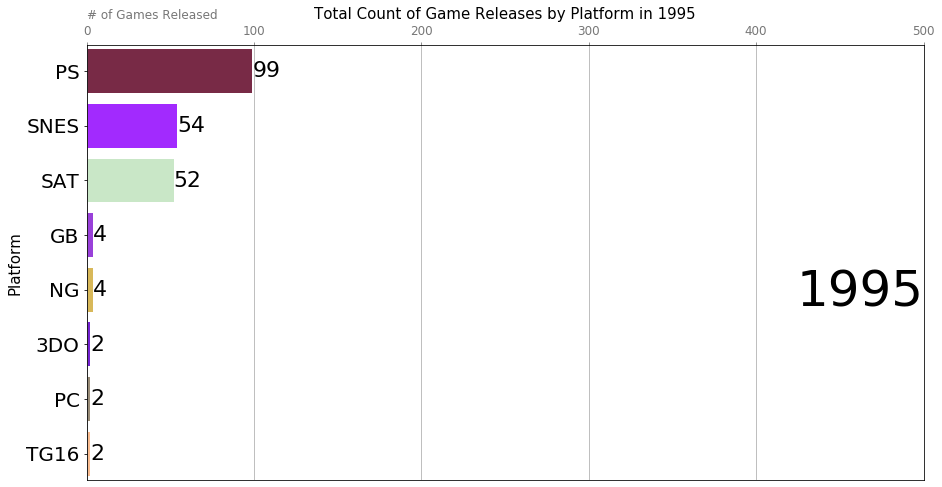

In [45]:
fig, ax = plt.subplots(figsize=(15, 8))
#using animation library to call function at regular intervals (speed) controlled by interval amount
animator = animation.FuncAnimation(fig, draw_barchart, frames=range(1995, 2017), interval = 2500)
HTML(animator.to_jshtml()) 

Using the Matplotlib animation library, FuncAnimation repeatedly calls the previous draw_barchart function that shows each year's platform release volume data.  The range encompasses all years in the dataframe and the interval controls the speed at which each graph changes (the higher the interval, the longer each year's graph stays on the screen.) Hit the 'play button' to start the animation and pause as necessary.   This slideshow could be played in a video game store as an attraction for interested customers.

### Video Game Global Sales by Platform by Year of Release

Will follow the same process as above to create a 'slideshow' of platform Global Sales by year (rather than games released).

In [46]:
platsales=vg_data_clean.groupby(['Year_of_Release', 'Platform'])[['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']].sum().reset_index().sort_values(by=['Year_of_Release','Global_Sales'], ascending=[True,False])

Created a new dataframe to group the regional sales columns by Year of Release and Platform

In [47]:
platsales

Year_of_Release Platform  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
4               1995       PS     14.61      9.85      9.54         1.96   
6               1995     SNES      7.26      2.22     22.37         0.35   
5               1995      SAT      0.55      0.42     10.55         0.05   
3               1995       PC      1.72      2.27      0.00         0.23   
1               1995       GB      0.69      0.14      2.72         0.05   
..               ...      ...       ...       ...       ...          ...   
184             2016     WiiU      2.10      1.48      0.67         0.35   
182             2016      PSV      0.15      0.39      3.56         0.15   
180             2016      PS3      0.67      1.26      1.30         0.37   
185             2016     X360      0.69      0.71      0.00         0.12   
183             2016      Wii      0.06      0.11      0.00         0.01   

     Global_Sales  
4           35.92  
6           32.21  
5           11.58  
3            4.23  
1            3.60  
..            ...  
184          4.58  
182          4.27  
180          3.58  
185          1.52  
183          0.18  

[187 rows x 7 columns]

In [48]:
platsalesyear=platsales[platsales['Year_of_Release'].eq(current_year)]

Created dataframe containing only data for the selected year variable

In [49]:
platsalesyear

Year_of_Release Platform  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
133             2011      PS3     64.88     56.24     14.10        21.56   
137             2011     X360     86.75     42.58      1.78        12.73   
129             2011      3DS     27.34     18.63     12.83         4.40   
136             2011      Wii     31.11     17.68      5.58         5.28   
131             2011       PC     10.76     18.94      0.00         5.33   
130             2011       DS     14.27      5.71      4.32         1.88   
134             2011      PSP      2.06      1.35     13.57         0.84   
135             2011      PSV      1.49      1.71      0.80         0.63   
132             2011      PS2      0.13      0.13      0.09         0.10   

     Global_Sales  
133        156.79  
137        143.94  
129         63.17  
136         59.64  
131         35.10  
130         26.26  
134         17.82  
135          4.60  
132          0.47

Dataframe contains only data for selected year 

In [50]:
#Rounding Global Sales to 2 decimal places for display in any charts 
platsales['Global_Sales'] = platsales['Global_Sales'].apply(lambda x: round(x, 2))

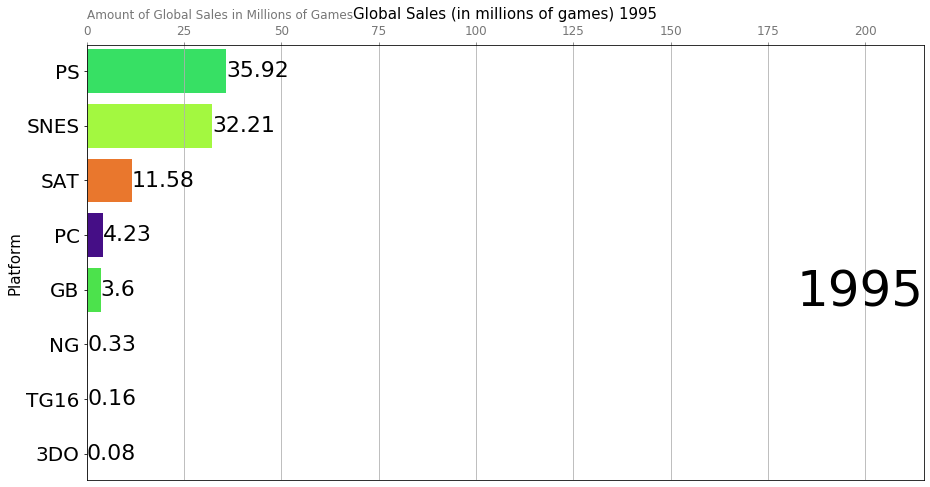

In [51]:

#Code to assign each platform a different color and keep them consistent if the years are changed
def transform_color(color, amount = 0.5):
    try:
        c = mc.cnames[color]
    except:
        c = color
        c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], 1 - amount * (1 - c[1]), c[2])

all_names = platsales['Platform'].unique().tolist()
random_hex_colors = []
for i in range(len(all_names)):
    random_hex_colors.append('#' + '%06X' % randint(0, 0xFFFFFF))

rgb_colors = [transform_color(i, 1) for i in random_hex_colors]

#Create figure and call the draw_barchart function
fig, ax = plt.subplots(figsize=(15, 8))
def draw_barchart(year):
    platsalesyear=platsales[platsales['Year_of_Release'].eq(year)]
    platsalesyear =  platsalesyear[::-1]
    ax.clear()
    
    normal_colors = dict(zip(platsales['Platform'].unique(), rgb_colors))
    
    #horizontal bar graph of platform and count
    ax.barh(platsalesyear['Platform'], platsalesyear['Global_Sales'], color = [normal_colors[i] for i in platsalesyear['Platform']])
    #loop to put text of game release total after the bar
    for i, (Global_Sales, Platform) in enumerate(zip(platsalesyear['Global_Sales'], platsalesyear['Platform'])):
        ax.text(Global_Sales, i,     Global_Sales, ha='left', va='center', color = 'black', size = 22)
    ax.text(1, 0.4, year, transform=ax.transAxes, size=50, ha='right')
    ax.text(0, 1.06, 'Amount of Global Sales in Millions of Games', transform=ax.transAxes, size=12, color='#777777')
    
    ax.xaxis.set_ticks_position('top')
    plt.tick_params(labelsize = 20)
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.margins(0, 0.01)
    #setting gridlines on chart
    ax.grid(which='major', axis='x', linestyle='-')
    #setting an x axis max value amount to close to the platform with the highest Global Sales in a year to show relative comparisions across years
    ax.set_xlim(xmax=215)
    #ax.set_xlabel('Global Sales (in millions of games)')
    ax.set_ylabel('Platform', size=15)
    ax.set_title('Global Sales (in millions of games)' + ' ' + str(year), size=15)
    
#Start with Year 1995    
draw_barchart(1995)

Once again random colors are assigned to the bars and kept consistent for each platform in different years. Also, the x axis value limit (xlim) is set to around the highest Sales value of any platform in any year (~215) to keep the scale consistent instead of changing each year. This more easily shows platform unit increase and decreases over the years.

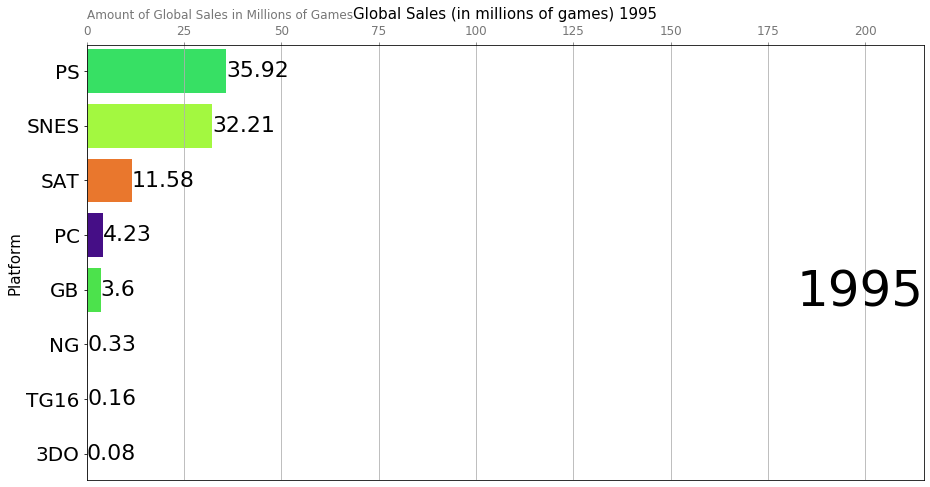

In [52]:
fig, ax = plt.subplots(figsize=(15, 8))
animator = animation.FuncAnimation(fig, draw_barchart, frames=range(1995, 2017), interval = 3000)
HTML(animator.to_jshtml()) 

Like the previous platform unit sales by year animation slideshow, hitting play button and toggling the intervals values for desired speed will play the Global Sales by Platforom by Year animation.

### Highest Selling Game Per Platform Per Year

There are different ways to consider "best" games of the year, but one of the key metrics is which game sells the most units.  An animation/slideshow will be created that shows the highest selling game for each platform for each year.

In [53]:
#Use idxmax() to get the index id of the highest game sales per platform per year
platmaxid=vg_data_clean.groupby(['Year_of_Release','Platform'])[['Global_Sales']].idxmax().reset_index()


Created dataframe that groups Global Sales by Year of Release and Platform and uses idxmax() to get the index id of the game with the maximum sales per platform and year.  

In [54]:
#get index id of max
x=platmaxid['Global_Sales']

Created variable to get that max ID to then use to pull those records out of the original dataset.

In [55]:
vg_data_maxsalesplat=vg_data_clean.loc[x].sort_values(by=['Year_of_Release','Global_Sales','Platform'], ascending=[True,False,True])

Inserting that variable (x) into a .loc command to pull out individual records from the original vg_data_clean dataset. This allows us to pull in any desired column like 'Name' that wouldn't be included by just doing a group by of year and platform.

In [56]:
vg_data_maxsalesplat.head(3)

Name Platform  Year_of_Release  \
191  Donkey Kong Country 2: Diddy's Kong Quest     SNES             1995   
273             Warcraft II: Tides of Darkness       PC             1995   
321                         Namco Museum Vol.1       PS             1995   

        Genre                    Publisher  NA_Sales  EU_Sales  JP_Sales  \
191  Platform                     Nintendo      2.10      0.74      2.20   
273  Strategy                   Activision      1.70      2.27      0.00   
321      Misc  Sony Computer Entertainment      2.12      1.44      0.22   

     Other_Sales  Global_Sales  Critic_Score  User_Score Rating  
191         0.11          5.15           NaN         NaN    NaN  
273         0.23          4.21           NaN         NaN    NaN  
321         0.06          3.84           NaN         NaN    NaN

The dataframe includes a row for each platform's highest selling game (global sales) per year in descending order.  Looking at the above 3 rows, the highest selling game in 1995 was Donkey King Country 2 on SNES at 5.15 million units.

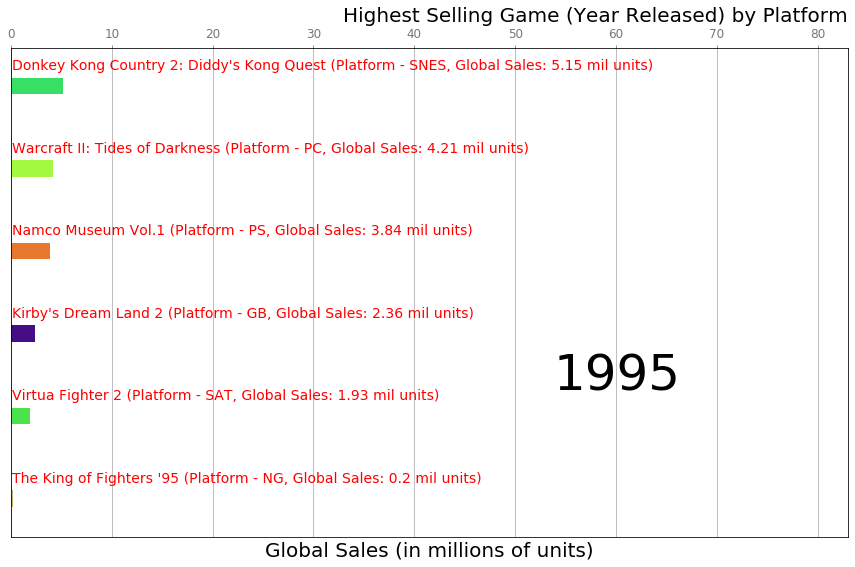

In [57]:

#Code to assign each platform a different color and keep them consistent if the years are changed
def transform_color(color, amount = 0.5):
    try:
        c = mc.cnames[color]
    except:
        c = color
        c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], 1 - amount * (1 - c[1]), c[2])


rgb_colors = [transform_color(i, 1) for i in random_hex_colors]

fig, ax = plt.subplots(figsize=(15, 9))

def draw_barchart2(year):
    #Creating lists of regular intervals for text placement in the chart
    ind2=np.arange(.8,6.8, 1).tolist() 
    ind3=np.arange(.6, 6.6, 1).tolist()

    #Taking top 6 values each year and assigning to new dataframe
    vg_data_maxsalesplat2=vg_data_maxsalesplat[vg_data_maxsalesplat['Year_of_Release'].eq(year)].head(6)
    #Creating lists of names/values for use in chart
    global_sales=vg_data_maxsalesplat2['Global_Sales']
    names=vg_data_maxsalesplat2['Name'].tolist()
    platforms=vg_data_maxsalesplat2['Platform'].tolist()
    platforms2=vg_data_maxsalesplat['Platform'].tolist()
    global_sales2=vg_data_maxsalesplat2['Global_Sales'].tolist()
    
    ax.clear()
    
    normal_colors = dict(zip(vg_data_maxsalesplat['Platform'].unique(), rgb_colors))

    width = 0.2      # the width of the bars
    
    #horizontal bar graph of platform and Sales, positining bars at regular intervals on chart (ind2)
    ax.barh(ind2,global_sales, width, label = 'Global Sales', color = [normal_colors[i] for i in vg_data_maxsalesplat2['Platform']])


    plt.title('Highest Selling Game (Year Released) by Platform',size=20, color='black', loc='right')

    #Creating loop to position text at regular y intervals (ind3) showing game name, platform, and global sales
    for i in range(len(names)):

     ax.text( x = 0.1,y = ind3[i] , s = names[i] + ' ' + '('+ 'Platform - ' + platforms[i]+  ',' + ' ' + 'Global Sales:'+ ' ' + str(global_sales2[i]) + ' ' +'mil units)', size = 14, color = 'red')
    
    plt.gca().invert_yaxis() #arrange so the years are shown in ascending order

    #show year of each chart on right to make it more obvious what year is showing
    ax.text(.8, 0.3, year, transform=ax.transAxes, size=50, ha='right')
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.set_xlabel('Global Sales (in millions of units)', size=20)
    ax.set_yticks([])
    ax.margins(.05, .07)
    ax.grid(which='major', axis='x', linestyle='-')

    ax.set_axisbelow(True)
    #Setting x axis limit to the highest game unit sales of any year 
    ax.set_xlim(xmax=83)
    
    #plt.box(False)

    
draw_barchart2(1995)
    


Used a similar process as the previous 'slideshows' with showing colored platform bars changing by year. The biggest difference for this is that the charts are showing individual game text (name/platform/sales) placed on top of each bar at appropriate locations.  

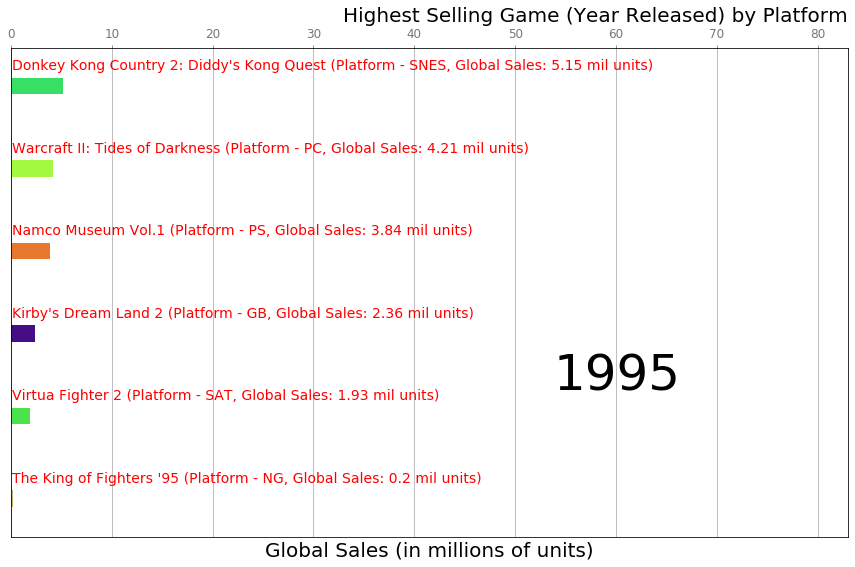

In [58]:
fig, ax = plt.subplots(figsize=(15, 9))
animator = animation.FuncAnimation(fig, draw_barchart2, frames=range(1995, 2017), interval = 2500)
HTML(animator.to_jshtml()) 

Press the play button to see the top selling game per platform for each year.

### Video Game Regional Sales by Platform

To find out what the most popular platforms (in terms of units sold) are in different regions, regional graphs can be created showing the top 10 platforms for North America, European Union, Japan, and 'Other'.

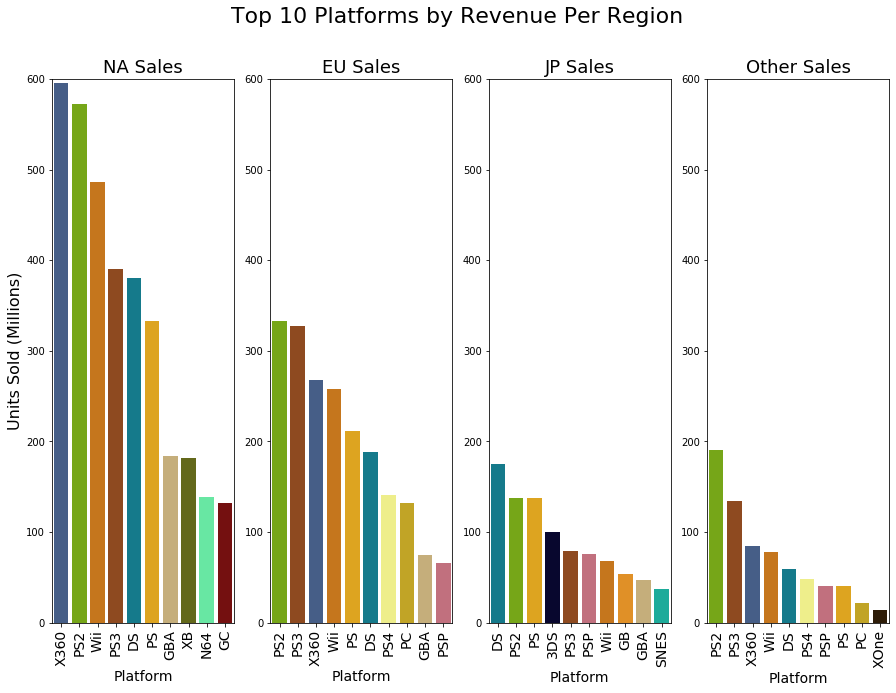

In [59]:
#getting the top 10 regional sales for platforms in 4 dataframes
na=platsales.groupby(['Platform'])[['NA_Sales']].sum().sort_values(by=['NA_Sales'], ascending=[False]).head(10)
eu=platsales.groupby(['Platform'])[['EU_Sales']].sum().sort_values(by=['EU_Sales'], ascending=[False]).head(10)
jp=platsales.groupby(['Platform'])[['JP_Sales']].sum().sort_values(by=['JP_Sales'], ascending=[False]).head(10)
other=platsales.groupby(['Platform'])[['Other_Sales']].sum().sort_values(by=['Other_Sales'], ascending=[False]).head(10)

#assigning colors to platforms to visually see changes aross regions
colors =  {'DS':sns.xkcd_rgb["teal blue"], 'X360':sns.xkcd_rgb["denim blue"], 'PS2':sns.xkcd_rgb["dark lime green"],'PS4':sns.xkcd_rgb["light yellow"],'Wii':sns.xkcd_rgb["pumpkin"], 'PS3':sns.xkcd_rgb["burnt umber"], 'PS':sns.xkcd_rgb["yellow orange"],'GBA':sns.xkcd_rgb["tan"],'XB':sns.xkcd_rgb["olive"],'N64':sns.xkcd_rgb["sea green"],'GC':sns.xkcd_rgb["dark red"],'PSP':sns.xkcd_rgb["rose"],'SNES':sns.xkcd_rgb["turquoise"],'PC':sns.xkcd_rgb["gold"],'XOne':sns.xkcd_rgb["dark brown"],'3DS':sns.xkcd_rgb["midnight blue"],'GB':sns.xkcd_rgb["tangerine"]}


fig,axs = plt.subplots(figsize=(15,10))

ax1 = plt.subplot(1,4,1)
ax1.set_xticklabels(labels = na.index, rotation=90, size=14)
sns.barplot(x=na.index, y=na['NA_Sales'], palette=colors)
plt.title('NA Sales', size=18)
plt.ylabel('Units Sold (Millions)', size=16)
#Setting the y axis max value to the highest amount of any platform in a year to show relative amounts more clearly
ax1.set_ylim(ymax=600)


ax2 = plt.subplot(1,4,2)
ax2.set_xticklabels(labels = eu.index, rotation=90, size=14)
sns.barplot(x=eu.index, y=eu['EU_Sales'],palette=colors)
plt.title('EU Sales', size=18)
ax2.set_ylim(ymax=600)
ax2.yaxis.label.set_visible(False)

ax3 = plt.subplot(1,4,3)
ax3.set_xticklabels(labels = jp.index, rotation=90, size=14)
sns.barplot(x=jp.index, y=jp['JP_Sales'],palette=colors)
plt.title('JP Sales', size=18)
ax3.set_ylim(ymax=600)
ax3.yaxis.label.set_visible(False)

ax4 = plt.subplot(1,4,4)
ax4.set_xticklabels(labels = other.index, rotation=90, size=14)
sns.barplot(x=other.index, y=other['Other_Sales'],palette=colors)
plt.title('Other Sales', size=18)
ax4.set_ylim(ymax=600)
ax4.yaxis.label.set_visible(False)

plt.suptitle('Top 10 Platforms by Revenue Per Region', size=22)
plt.show();

A 1x4 subplots was used to show 4 graphs side by side and platform colors were kept consistent across the graphs.  The top 5 U.S. platforms (XBox 360, PS2, Wii, PS3, and DS) have more unit sales than any platform in the other regions. XBox 360 games are the highest selling in NA, PS2 are the highest selling in EU and 'Other', while Ninendo DS is the highest selling in Japan.

### Highest Overall Critic Rated Games Per Year

Another way of considering the "best" video game is seeing which game was rated highest by game critics. Here, a single chart is created that shows the highest critic rated game per year across any platform.

In [60]:
vg_data_clean.isnull().sum()

Name                  0
Platform              0
Year_of_Release       0
Genre                 0
Publisher             0
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       7979
User_Score         8499
Rating             6195
dtype: int64

In [61]:
#creating new dataframe for games with scores by dropping NA values for score columns
#df_games_nona=vg_data_clean.dropna()
df_games_nona=vg_data_clean.dropna(subset=['Critic_Score','User_Score'])

Given the data is focusing only on rows critic scores, a new dataframe will be created that drops all the previous NA rows from Metacritic columns

In [62]:
years=df_games_nona['Year_of_Release'].sort_values().unique()

In [63]:
df_games_nona.describe()

Year_of_Release     NA_Sales     EU_Sales     JP_Sales  Other_Sales  \
count      6890.000000  6890.000000  6890.000000  6890.000000  6890.000000   
mean       2007.492598     0.391087     0.234608     0.063827     0.082033   
std           4.215182     0.963477     0.684397     0.286486     0.268693   
min        1996.000000     0.000000     0.000000     0.000000     0.000000   
25%        2004.000000     0.060000     0.020000     0.000000     0.010000   
50%        2007.000000     0.150000     0.060000     0.000000     0.020000   
75%        2011.000000     0.390000     0.210000     0.010000     0.070000   
max        2016.000000    41.360000    28.960000     6.500000    10.570000   

       Global_Sales  Critic_Score   User_Score  
count   6890.000000   6890.000000  6890.000000  
mean       0.771737     70.259071    71.852830  
std        1.955277     13.863091    14.387826  
min        0.010000     13.000000     5.000000  
25%        0.110000     62.000000    65.000000  
50%        0.290000     72.000000    75.000000  
75%        0.750000     80.000000    82.000000  
max       82.530000     98.000000    96.000000

In [64]:
years

<IntegerArray>
[1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]
Length: 21, dtype: Int32

'years' list is created for each unique year in the new df_games_nona dataframe.

In [65]:
df_games_topcritic=pd.DataFrame()
for year in years:
    top_critic_score=(df_games_nona.loc[df_games_nona.Year_of_Release==year])
    top_critic_score=top_critic_score.loc[top_critic_score['Critic_Score'].idxmax()]
    df_games_topcritic=df_games_topcritic.append(top_critic_score)

Loop through the years to get the index ID of the maximum critic score per year (using idxmax()) and append it to a new df_games_topcritic dataframe.

In [66]:
df_games_topcritic.head(3)

Critic_Score  EU_Sales         Genre  Global_Sales  JP_Sales  NA_Sales  \
1160          94.0      1.58  Role-Playing          1.59      0.00      0.01   
52            96.0      3.87        Racing         10.95      2.54      4.02   
106           96.0      2.22      Fighting          7.16      1.40      3.27   

              Name  Other_Sales Platform                    Publisher Rating  \
1160        Diablo         0.00       PC                   Activision      M   
52    Gran Turismo         0.52       PS  Sony Computer Entertainment      E   
106       Tekken 3         0.29       PS  Sony Computer Entertainment      T   

      User_Score  Year_of_Release  
1160        87.0           1996.0  
52          87.0           1997.0  
106         91.0           1998.0

There were no games in 1995 with critic scores, those start in 1996.  The columns in the dataframe are in a different order than before, so those will be re-set.

In [67]:
cols=['Name','Platform','Year_of_Release','Genre','Publisher','NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales','Critic_Score','User_Score','Rating']

In [68]:
df_games_topcritic=df_games_topcritic[cols]

Created a list of columns in the right order and applied it to the dataframe.

In [69]:
df_games_topcritic['Year_of_Release']=df_games_topcritic['Year_of_Release'].astype(int)

In [70]:
df_games_topcritic.head(3)

Name Platform  Year_of_Release         Genre  \
1160        Diablo       PC             1996  Role-Playing   
52    Gran Turismo       PS             1997        Racing   
106       Tekken 3       PS             1998      Fighting   

                        Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
1160                   Activision      0.01      1.58      0.00         0.00   
52    Sony Computer Entertainment      4.02      3.87      2.54         0.52   
106   Sony Computer Entertainment      3.27      2.22      1.40         0.29   

      Global_Sales  Critic_Score  User_Score Rating  
1160          1.59          94.0        87.0      M  
52           10.95          96.0        87.0      E  
106           7.16          96.0        91.0      T

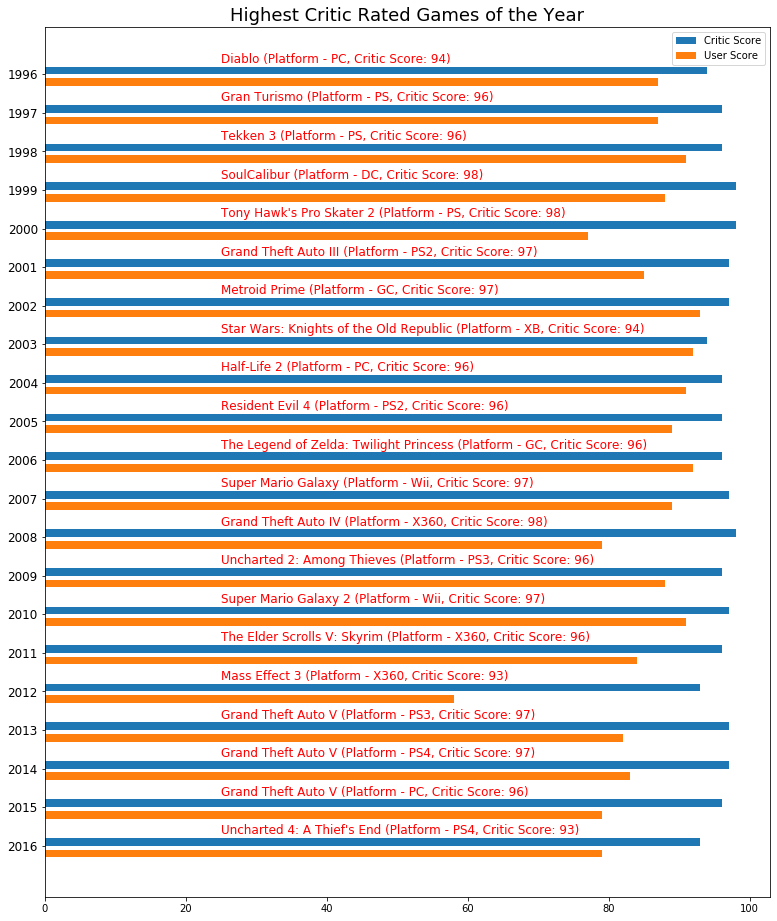

In [71]:
plt.figure(figsize=(13,16))

#Creating lists of regular intervals for text placement in the chart
locations = np.arange(1, 22, 1).tolist()
ind1=np.arange(1.2, 22.2, 1).tolist()
ind2=np.arange(0.9, 21.9, 1).tolist() 
ind3=np.arange(0.7, 21.7, 1).tolist()

user_score=df_games_topcritic['User_Score']
critic_score=df_games_topcritic['Critic_Score']
names=df_games_topcritic['Name'].tolist()
platforms=df_games_topcritic['Platform'].tolist()
critic_scores=df_games_topcritic['Critic_Score'].tolist()

width = 0.2      # the width of the bars

#Will have 2 separate bars for Critis Score and User Score
plt.barh(ind2,critic_score, width, label = 'Critic Score')
plt.barh(ind1, user_score,width, label = 'User Score')

plt.title('Highest Critic Rated Games of the Year',size=18)

#y location of the ticks
plt.yticks(locations, years,size=12)

# loop to apply the text for each year on top of the bars
for i in range(len(names)):
    
    plt.text( x = 25,y = ind3[i] , s = names[i] + ' ' + '('+ 'Platform - ' + platforms[i]+  ',' + ' ' + 'Critic Score:' + ' ' + str(int(critic_scores[i]))+ ')', size = 12, color = 'red')

plt.gca().invert_yaxis() #arrange so the years are shown in ascending order
plt.legend(loc='upper right')

plt.show()

Using a similar approach to the previous graph regarding game text placement.  In this graph, the highest critic scored game for each year is listed along with the related user score for comparison.  There's a 3 way tie for the game with the highest critic score - 1999's **SoulCalibur** on DC, 2000's **Tony Hawk's Pro Skater 2** on PlayStation, and 2008's **Grand Theft Auto IV** on XBox 360 all have a score of 98.  Since they are tied, a reasonable way to break the tie is use the associated User Score which leads to **SoulCaliber** being the highest rated game in the dataset.

### Game Sales and Score Relationship

To get a general idea of how critic/user scores are related to Global Sales and to each other (without doing an in depth statistical model), visual scatterplots can be created and simple correlations between the variables can be ran.

Text(0.5, 1.0, 'Critic Score and User Score Scatterplot')

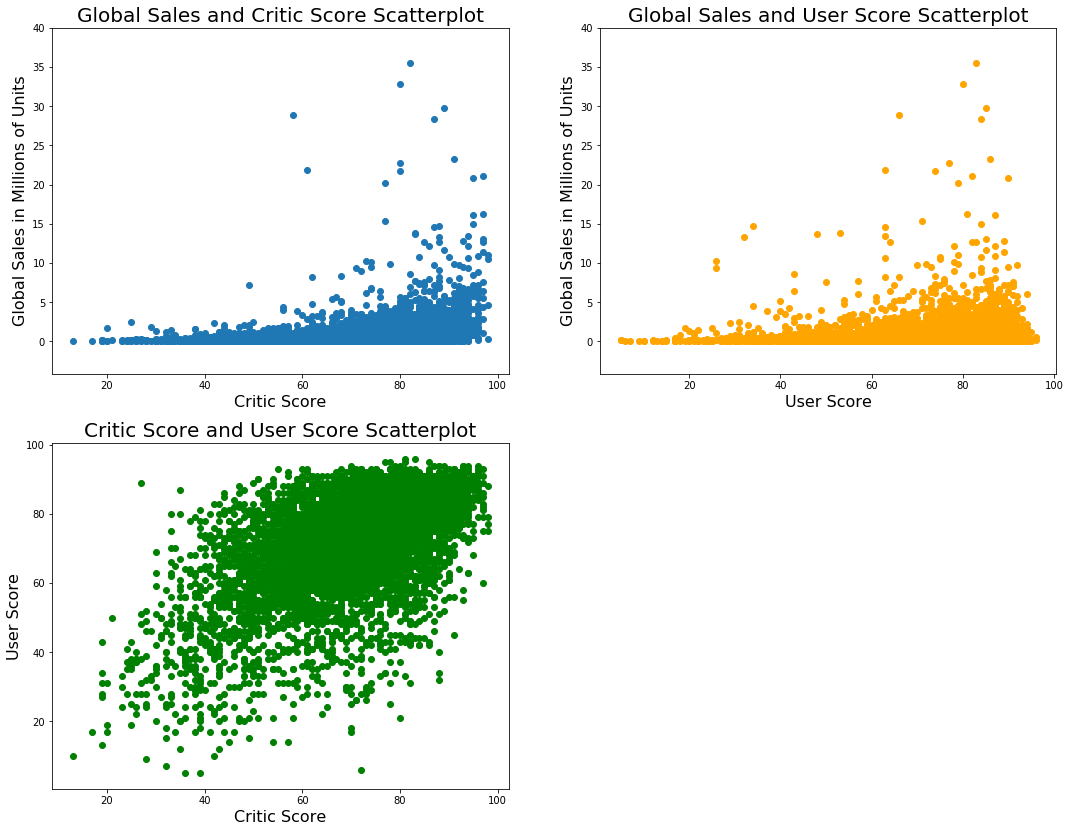

In [72]:

fig,ax=plt.subplots(figsize=(18,14)) 

ax1=plt.subplot(2,2,1)
#Creating scatterplat and using the df_games_nona dataset that had all the NAN rows removed since Metacritic scores are being used
ax1.scatter("Critic_Score", "Global_Sales", data=df_games_nona)
#Setting y limit to not show the huge outlier that's over 80
ax1.set_ylim(ymax=40)
ax1.set_xlabel(xlabel='Critic Score', fontsize=16)
ax1.set_ylabel(ylabel='Global Sales in Millions of Units', fontsize=16)
ax1.set_title(label='Global Sales and Critic Score Scatterplot', fontsize=20)

ax2=plt.subplot(2,2,2)
ax2.scatter("User_Score", "Global_Sales", data=df_games_nona, color='orange')
ax2.set_ylim(ymax=40)
ax2.set_xlabel(xlabel='User Score', fontsize=16)
ax2.set_ylabel(ylabel='Global Sales in Millions of Units', fontsize=16)
ax2.set_title(label='Global Sales and User Score Scatterplot', fontsize=20)

ax2=plt.subplot(2,2,3)
ax2.scatter("Critic_Score", "User_Score", data=df_games_nona, color='green')
ax2.set_xlabel(xlabel='Critic Score', fontsize=16)
ax2.set_ylabel(ylabel='User Score', fontsize=16)
ax2.set_title(label='Critic Score and User Score Scatterplot', fontsize=20)



The scatterplots for critic and user score with global sales are visually pretty similar with what appears to be a slight positive relationship (when scores are higher, sales are higher) but it doesn't appear too strong as a clear linear shape isn't apparent. The safest conclusion is that the highest selling games don't have low scores and usually have higher than average scores.  There are a few more individual cases of higher selling games with lower user scores than lower critic scores.

The user score/critic score scatterplot is a much more linear shape showing that they 2 scores have a stronger positive relationship. A quick statisical correlation of the variables is run to build on what can be seen in the scatterplots.

In [73]:
#correlation of global sales and critic score
df_games_nona['Global_Sales'].corr(df_games_nona['Critic_Score'])

0.23711830360893857

In [74]:
#correlation of global sales and user score
df_games_nona['Global_Sales'].corr(df_games_nona['User_Score'])

0.0883153401873768

In [75]:
#correlation of critic score and user score
df_games_nona['Critic_Score'].corr(df_games_nona['User_Score'])

0.5798779716553756

Running a correlation between the different variables shows that while global sales has a weak-to-moderate positive relationship with Critic Score (0.24 correlation coefficient), global sales has a pretty weak positive correlation with user scores (0.09).  Overall, scores likely aren't a strong predictor of sales (and vice versa) by themselves.

The correlation for critic score and user score is stronger (echoing the scatterplot) with a correlation coefficient of 0.58 that could be considered moderate-to-strong.  It's reasonable that often user and critic scores move similarly when reviewing video games, but there are enough instances of them behaving differently for the relationship to not be considered 'super strong' (coefficient closer to 1). 

### Video Game Release Totals and Global Sales by Publisher (Top 20)

The video game dataset can also show who the top game publishers are by game release volume and units sold.

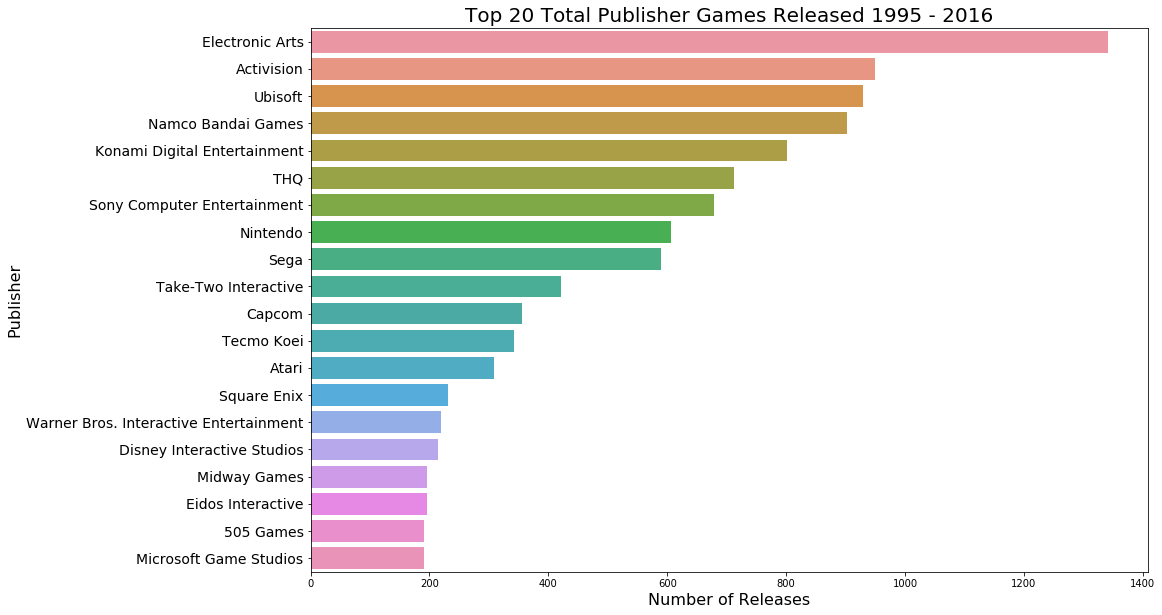

In [76]:
#new dataframe to group by publisher game volume and return the top 20 rows
datapub = vg_data_clean.groupby(['Publisher']).count().iloc[:,0]
datapub = pd.DataFrame(datapub.sort_values(ascending=False))[0:20]
datapub.columns = ['# of Releases']

fig, ax = plt.subplots(figsize=(15,10))
#create seaborn bar plot
ax = sns.barplot(y = datapub.index , x = '# of Releases', data=datapub, orient='h')
ax.set_xlabel(xlabel='Number of Releases', fontsize=16)
ax.set_ylabel(ylabel='Publisher', fontsize=16)
ax.set_title(label='Top 20 Total Publisher Games Released 1995 - 2016', fontsize=20)
ax.set_yticklabels(labels = datapub.index, fontsize=14)
plt.show()


In [77]:
datapub['# of Releases'].sum()

10375

Electronic Arts is clearly the leader in games released with over 1300 games from 2000-2016.  This is over 40% higher than the next highest - Activision.  The top 20 publishers make up close to 2/3 the entire volume of games, accounting for 10,375 games.

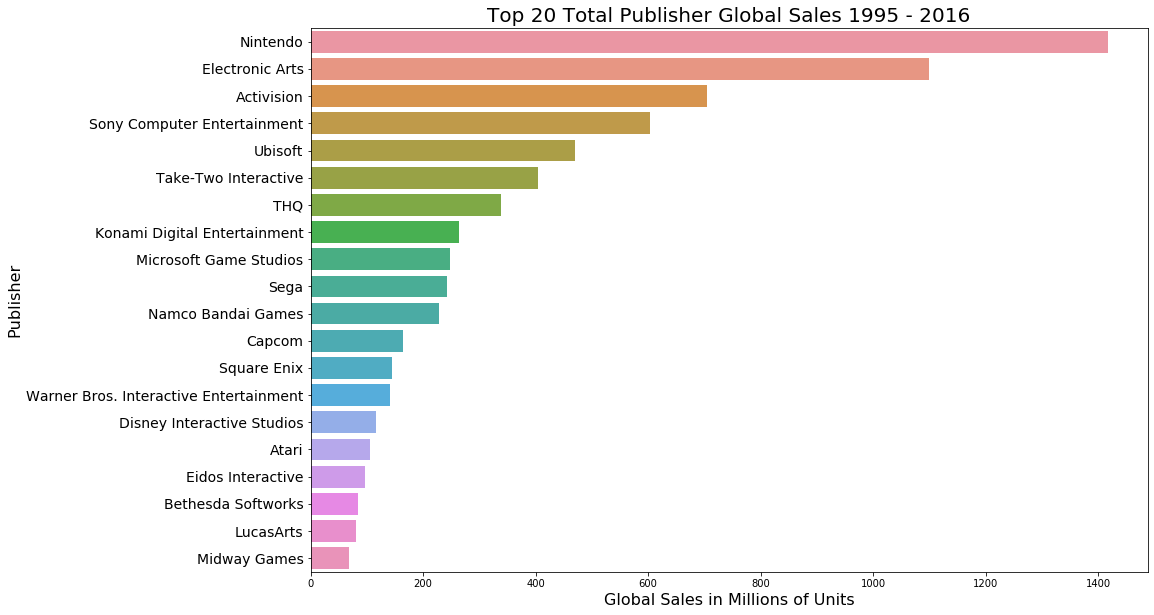

In [78]:
#new dataframe to group by publisher global sales and return the top 20 rows
datapub = vg_data_clean.groupby(['Publisher']).sum()['Global_Sales']
datapub = pd.DataFrame(datapub.sort_values(ascending=False))[0:20]
datapub.columns = ['Global Sales']


fig, ax = plt.subplots(figsize=(15,10))
#create seaborn bar plot
ax = sns.barplot(y =datapub.index  , x = 'Global Sales', data=datapub, orient='h')
ax.set_xlabel(xlabel='Global Sales in Millions of Units', fontsize=16)
ax.set_ylabel(ylabel='Publisher', fontsize=16)
ax.set_title(label='Top 20 Total Publisher Global Sales 1995 - 2016', fontsize=20)
ax.set_yticklabels(labels = datapub.index, fontsize=14)
plt.show()


In [79]:
datapub['Global Sales'].sum()

7020.129999999989

In [80]:
datapub['Global Sales'].sum()/vg_data_clean['Global_Sales'].sum()

0.8604112738753564

When switching to look at the top 20 publishers by units sold (vs games released), Nintendo is the clear leader with over 1400 million games sold (while it was 8th in terms of games released). While the top 20 publishers in units released make up 2/3 of that total, the top 20 publishers for units sold make up a whopping 86% of the total!

### Video Game Regional Sales by Genre

What types of video games do gamers play and do those patterns vary across different regions?  The data will show that.

In [81]:
#new dataframe to group regional sales by Genre
datagenre = vg_data_clean.groupby(['Genre'])['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales'].sum()

In [82]:
#show the dataframe contents
datagenre

NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales
Genre                                                                
Action          814.11    503.35    146.46       181.15       1646.10
Adventure        91.86     56.75     45.68        15.96        210.39
Fighting        205.25     94.50     67.67        35.15        402.52
Misc            392.43    208.88     99.51        72.85        774.31
Platform        318.83    170.03     77.05        45.92        612.15
Puzzle           71.27     42.74     33.57        10.79        158.82
Racing          342.82    230.32     44.73        74.54        692.61
Role-Playing    327.55    188.08    315.17        57.67        888.27
Shooter         527.59    308.23     30.06       102.06        968.37
Simulation      177.05    111.77     59.96        30.34        379.26
Sports          655.07    367.35    104.31       131.60       1259.07
Strategy         66.54     43.66     46.09        10.59        167.17

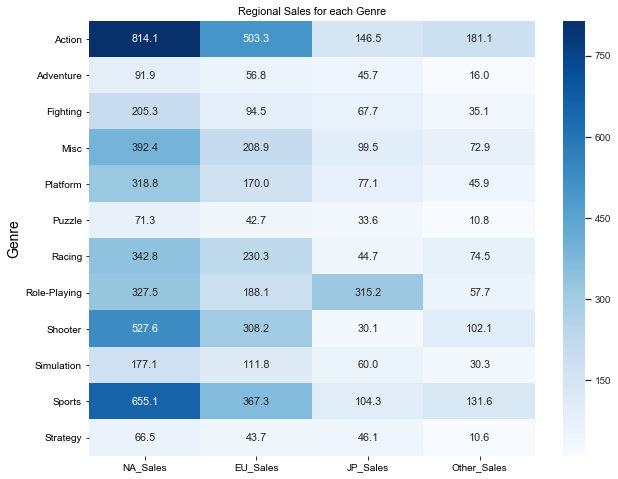

In [83]:
fig, ax =plt.subplots(figsize=(10,8))
sns.set(font_scale=0.9)
#Create Seaborn heatmap to show a colormap of values indicating where the highest sales are per Genre
ax=sns.heatmap(datagenre.loc[:, 'NA_Sales':'Other_Sales'], annot=True, fmt = '.1f', cmap = 'Blues')
#Due to a recennt heatmap bug that cut half of the top and bottom cells off, implementing a workaround
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title("Regional Sales for each Genre")
plt.show()

One cool way to see regional unit sales values (NA, EU, JP, Other) across genres for the whole dataset is creating a Seaborn heatmap. Using various shades of blue, the darker cells represent higher sales totals while lighter sales represent lower totals - It's an interesting visual representation when comparing sets of multiple variables.  Action, Shooter,and Sports appear highest across all regions with Strategy and Puzzle the lowest.  An interesting square that stands out is the **Role-Playing** genre for **Japanese Sales** - by far the highest in that region indicating Japanese gamers generally favor Role-Playing games.

In [84]:
datagenre['Global_Sales'].sort_values(ascending=False)

Genre
Action          1646.10
Sports          1259.07
Shooter          968.37
Role-Playing     888.27
Misc             774.31
Racing           692.61
Platform         612.15
Fighting         402.52
Simulation       379.26
Adventure        210.39
Strategy         167.17
Puzzle           158.82
Name: Global_Sales, dtype: float64

The color heatmap didn't include Global Sales, but that is easily seen looking at that sorted column in the datagenre dataframe. It shows similar findings as the heatmap in terms of highest and lowest sales genres.  

Text(0.5, 1.0, 'JP Sales Distribution by Genre')

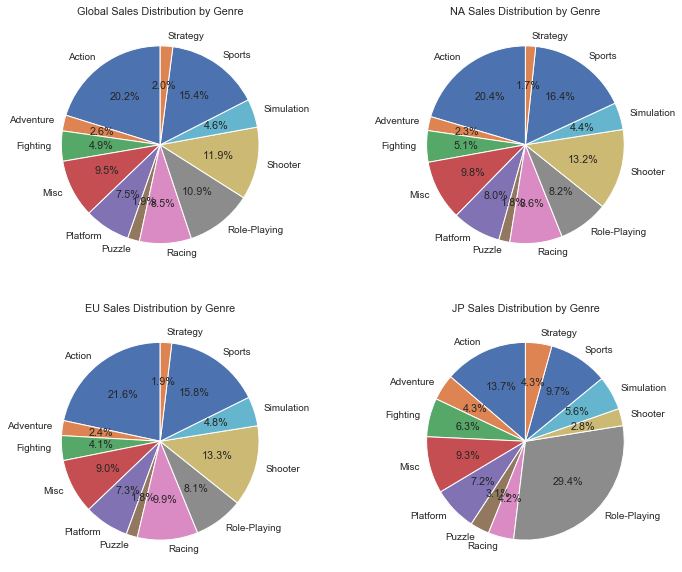

In [85]:
#Creating 2x2 subplots showing 4 piecharts of regional game sales data by genre
fig,ax=plt.subplots(figsize=(12,10))
ax1 = plt.subplot(2,2,1)
ax1.pie(
   datagenre['Global_Sales'],
    labels=datagenre.index,
    shadow=False,
    startangle=90,
    autopct='%1.1f%%'
    )
plt.title('Global Sales Distribution by Genre')


ax2 = plt.subplot(2,2,2)
ax2.pie(
   datagenre['NA_Sales'],
    labels=datagenre.index,
    shadow=False,
    startangle=90,
    autopct='%1.1f%%'
    )
plt.title('NA Sales Distribution by Genre')


ax3 = plt.subplot(2,2,3)
ax3.pie(
   datagenre['EU_Sales'],

    labels=datagenre.index,
    shadow=False,
    startangle=90,
    autopct='%1.1f%%'
    )
plt.title('EU Sales Distribution by Genre')

ax4 = plt.subplot(2,2,4)
ax4.pie(
   datagenre['JP_Sales'],
    labels=datagenre.index,
    shadow=False,
    startangle=90,
    autopct='%1.1f%%'
    )
plt.title('JP Sales Distribution by Genre')

Another way of visually showing the regional sales by game genre that was previously shown with a Seaborn heatmap is creating a 2x2 subplots figure of 4 Matplotlib pie charts (this time included global sales and didn't include 'Other').  Japan's role-playing game fandom still stands out!

### Video Game Global Sales by Game Rating by Year

The final column in the video game dataset that could be of interest is the Ratings which are the ESRB (Entertainment Software Ratings Board) ratings related to game content and appropriate audiences.  These ratings came from the Metacritic data, so not all games have documented ratings.

Text(0.5, 0, 'Year of Release')

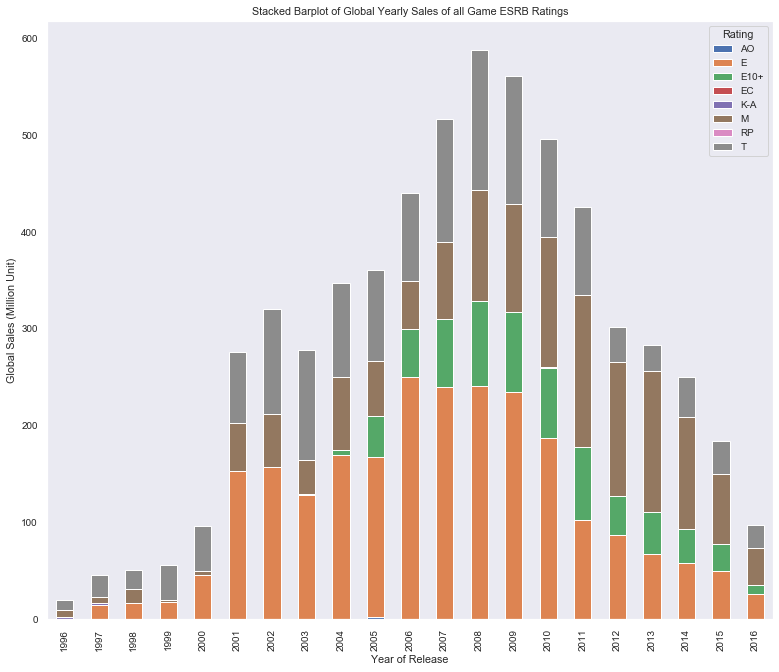

In [86]:
#new dataframe for global sales grouped by Year of Release and Rating
yearlySalesRating = vg_data_clean.groupby(['Year_of_Release','Rating']).Global_Sales.sum()
#plotting stacked bar plot to show relative ratings sales distribution by year
yearlySalesRating.unstack().plot(kind='bar',stacked=True,  
                           grid=False,  figsize=(13,11))
plt.title('Stacked Barplot of Global Yearly Sales of all Game ESRB Ratings')
plt.ylabel('Global Sales (Million Unit)')
plt.xlabel('Year of Release')

A stacked barplot is created to show relative ratings distribution of global sales per year.  The most obvious visual takeaway is 'Mature' rated games sales proportions have been increasing since 2011 while 'Everyone' rated games have been decreasing in proportion.

## Quick Summary/Insights Recap

### Best Rated Games

Highest Overall Critic Rated Games Per Year<br>

- **1996** - Diablo (PC) Score:94<br>
- **1997** - Gran Turismo (PS) Score:96<br>
- **1998** - Tekken 3 (PS) Score:96<br>
- **1999** - SouCalibur (DC) Score:98<br>
- **2000** - Tony Hawk's Pro Skater 2 (PS) Score:98<br>
- **2001** - Grand Theft Auto III (PS2) Score:97<br>
- **2002** - Metroid Prime (GC) Score:97<br>
- **2003** - Star Wars: Knights of the Old Republic (XB) Score:94<br>
- **2004** - Half-Life 2 (PC) Score:96<br>
- **2005** - Resident Evil 4 (PS2) Score:96<br>
- **2006** - The Legend of Zelda: Twilight Princess (GC) Score:96<br>
- **2007** - Super Mario Galaxy (Wii) Score:97<br>
- **2008** - Grand Theft Auto IV (X360) Score:98<br>
- **2009** - Uncharted 2: Among Thieves (PS3) Score: 96<br>
- **2010** - Super Mario Galaxy 2 (Wii) Score:97<br>
- **2011** - The Elder Scrolls V: Skyrim (X360) Score:96<br>
- **2012** - Mass Effect 3 (X360) Score:93<br>
- **2013** - Grand Theft Auto V (PS3) Score:97<br>
- **2014** - Grand Theft Auto V (PS4) Score:97<br>
- **2015** - Grand Theft Auto V (PC) Score:96<br>
- **2016** - Uncharted 4: A Thief's End (PS4) Score:93<br>



### Overall Game Release and Sales Volume

- The 'peak' period of the date range for game release volume is 2002-2012 with 2008 and 2009 being the top years having more than 1400 games released per year. All years had over 200 games released and 1995 had the least amount with just over 200 games.<br>

- Game sales are consistently significantly higher in North America than other regions every year except the first (1995) and last (2016).  All 4 regional sales have roughly the same line shape, indicating they generally increase or decrease together each year (Japan appears to be  the most different, staying relatively flat or decreasing during the peak periods of 2004-2009, while the other 3 regions steadily increase.) 

### Means and Medians

- Global Sales -  Mean: 0.51 mill    Median 0.16 mill
- NA Sales - Mean: 0.25 mill    Median 0.08 mill
- EU Sales - Mean: 0.14 mill Median: 0.02 mill
- JP Sales - Mean: 0.07 mill  Median: 0
- Critic Score - Mean: 68.99  Median: 71
- User Score - Mean: 71.27 Median: 75

The sales averages are significantly higher than the medians due to the games with huge individual sales units (ex: Wii Sports had 82.7 million units sold which is >160X the overall global sales average). <br>

Overall, user scores are slighly higher than critic scores when looking at the dataset as a whole though that will of course vary by each game.

### Platforms

- The platform with the most releases is Playstation 2 followed closely by Nintendo DS with both having more than 2000 games included. These are ~40% more than the next highest game system (Playstation 3). 26 different platforms have games released during the time period.

- Platform with the most game releases per year:

   - **1995**  Sony Playstation (99)<br>
   - **1996**  Sony Playstation (164)<br>
   - **1997**  Sony Playstation (188)<br>
   - **1998**  Sony Playstation (248)<br>
   - **1999**  Sony Playstation (200)<br>
   - **2000**  Sony Playstation (160)<br>
   - **2001**  Sony Playstation 2 (185)<br>
   - **2002**  Sony Playstation 2 (280)<br>
   - **2003**  Sony Playstation 2 (256)<br>
   - **2004**  Sony Playstation 2 (259)<br>
   - **2005**  Sony Playstation 2 (260)<br>
   - **2006**  Sony Playstation 2 (259)<br>
   - **2007**  Nintendo DS (376)<br>
   - **2008**  Nintendo DS (492)<br>
   - **2009**  Nintendo DS (403)<br>
   - **2010**  Nintendo DS (323)<br>
   - **2011**  Sony Playstation 3 (215)<br>
   - **2012**  Sony Playstation 3 (148)<br>
   - **2013**  Sony Playstation 3 (126)<br>
   - **2014**  Sony Playstation 3 (108)<br>
   - **2015**  Sony Playstation 4 (137)<br>
   - **2016**  Sony Playstation 4 (164)<br>
  
   
         

- The top 5 U.S. platforms (XBox 360, PS2, Wii, PS3, and DS) have more unit sales than any platform in the other regions. XBox 360 games are the highest selling in NA, PS2 are the highest selling in EU and 'Other', while Ninendo DS is the highest selling in Japan.

Platform with the most sales from games released that year (in millions of games):
    
   - **1995**  Sony Playstation (35.92)<br>
   - **1996**  Sony Playstation (94.68)<br>
   - **1997**  Sony Playstation (136.08)<br>
   - **1998**  Sony Playstation (169.58)<br>
   - **1999**  Sony Playstation (144.57)<br>
   - **2000**  Sony Playstation (96.3)<br>
   - **2001**  Sony Playstation 2 (166.43)<br>
   - **2002**  Sony Playstation 2 (205.4)<br>
   - **2003**  Sony Playstation 2 (184.29)<br>
   - **2004**  Sony Playstation 2 (211.78)<br>
   - **2005**  Sony Playstation 2 (160.65)<br>
   - **2006**  Nintendo Wii (137.12)<br>
   - **2007**  Nintendo Wii (152.89)<br>
   - **2008**  Nintendo Wii (171.45)<br>
   - **2009**  Nintendo Wii (207.08)<br>
   - **2010**  XBox 360 (170.08)<br>
   - **2011**  Sony Playstation 3 (156.79)<br>
   - **2012**  Sony Playstation 3 (107.27)<br>
   - **2013**  Sony Playstation 3 (113.17)<br>
   - **2014**  Sony Playstation 4 (99.97)<br>
   - **2015**  Sony Playstation 4 (118.96)<br>
   - **2016**  Sony Playstation 4 (69.29)<br>

### Genres

- Action, Shooter,and Sports appear highest across all regions with Strategy and Puzzle the lowest. An interesting square that stands out is the Role-Playing genre for Japanese Sales - by far the highest in that region indicating Japanese gamers generally favor Role-Playing games.

### Game Sales and Scores Relationships

- Global sales has a weak-to-moderate positive relationship with Critic Score (0.24 correlation coefficient), and it has a pretty weak positive correlation with user scores (0.09). Overall, scores likely aren't a strong predictor of sales (and vice versa) by themselves.

- The correlation for critic score and user score is stronger with a correlation coefficient of 0.58 that could be considered moderate-to-strong. It's reasonable that often user and critic scores move similarly when reviewing video games, but there are enough instances of them behaving differently for the relationship to not be considered 'super strong' (coefficient closer to 1). 

### Publishers

- **Electronic Arts** is clearly the leader in games released with over 1300 games from 2000-2016. This is over 40% higher than the next highest - **Activision**. The top 20 publishers make up close to 2/3 the entire volume of games, accounting for 10,375 games.

    When switching to look at the top 20 publishers by units sold (vs games released), **Nintendo** is the clear leader with over 1400 million games sold (while it was 8th in terms of games released). While the top 20 publishers in units released make up 2/3 of that total, the top 20 publishers for units sold make up 86% of the total.

### ESRB Ratings

- 'Mature' rated games sales proportions have been increasing since 2011 while 'Everyone' rated games have been decreasing in proportion.